In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ModuleNotFoundError: No module named 'matplotlib_inline'

[*********************100%***********************]  1 of 1 completed
Dataframe info:

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3282 entries, 2008-01-02 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3282 non-null   float64
 1   High    3282 non-null   float64
 2   Low     3282 non-null   float64
 3   Close   3282 non-null   float64
 4   Volume  3282 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.8 KB
None

Dataframe description
              Open         High          Low        Close         Volume
count  3282.000000  3282.000000  3282.000000  3282.000000    3282.000000
mean      3.713705     3.787288     3.635038     3.707074  131397.603595
std       1.830425     1.865744     1.789584     1.825297   54393.040171
min       1.441000     1.567000     1.432000     1.482000       0.000000
25%       2.691250     2.736500     2.644000     2.693000   91744.250000
50%       3.2

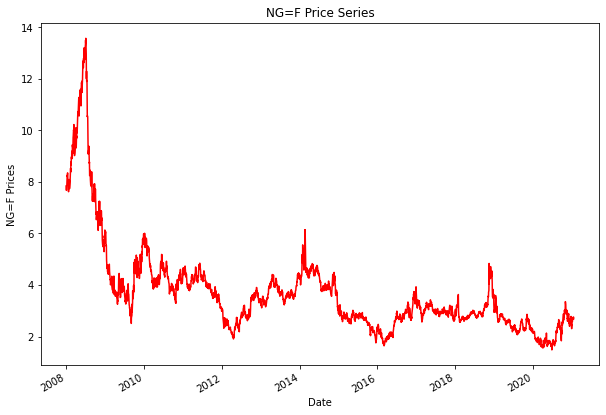

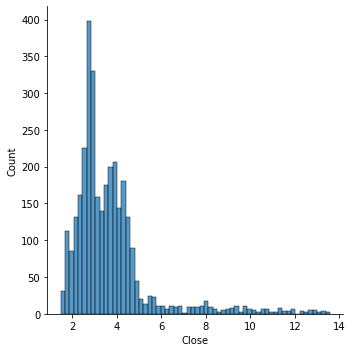

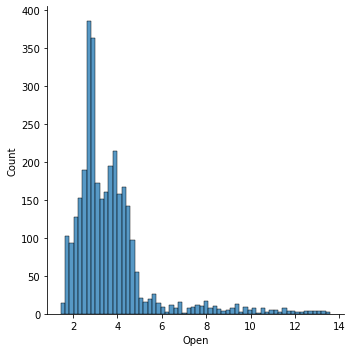

In [ ]:
# stocks = input ("Enter de code of the stock: - ")
stocks = "NG=F"
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True)
print("Dataframe info:\n")
print(data.info())
print("\nDataframe description")
print(data.describe(), end="\n\n")

# plot close data
data.Close.plot(figsize=(10, 7), color="r")
plt.ylabel(f"{stocks} Prices")
plt.title(f"{stocks} Price Series")
plt.show()

# plot data destribution
sns.displot(data["Close"])
sns.displot(data["Open"])
plt.show()

In [ ]:
# Problem example, from all data, predict "Close" (whether stocks will go up or down)
X = data.drop("Close", axis=1)
y = data["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, sep="\n")

(2625, 4)
(657, 4)
(2625,)
(657,)


In [ ]:
def calculate_metrics(y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_scores = r2_score(y_test, y_pred)

    print(f"\nMSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2_score: {r2_scores}")

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
calculate_metrics(predictions)

# With Regularizers
from sklearn.linear_model import Lasso, Ridge
la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

calculate_metrics(la_p)
calculate_metrics(ri_p)


MSE: 0.0015345662928837405
RMSE: 0.03917354072436829
R2_score: 0.9994383299702719

MSE: 0.23692336260533006
RMSE: 0.486747740215946
R2_score: 0.9132831519010182

MSE: 0.0016151026199612945
RMSE: 0.040188339353117025
R2_score: 0.999408852689666


In [ ]:
# With SVM
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {
    "C" : [0.1, 1, 10, 100, 1000],
    "gamma" : [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["rbf"]
    }

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.070 total time=   0.1s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.072 total time=   0.1s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   0.1s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.050 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.070 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.072 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.050 total time=   0.1s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.073 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
import joblib

joblib.dump(ri, "model.pkl")
model = joblib.load("model.pkl")

print(model)

Ridge()


In [ ]:
print("oi")

: 